### 1. Загрузить файл hr.csv 

In [76]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scikit_posthocs as posthocs
import seaborn as sns
import statistics
from statistics import median
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
import copy

In [89]:
data = pd.read_csv('HR.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.profile_report()

### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [8]:
data_corr = data.corr()

<AxesSubplot:>

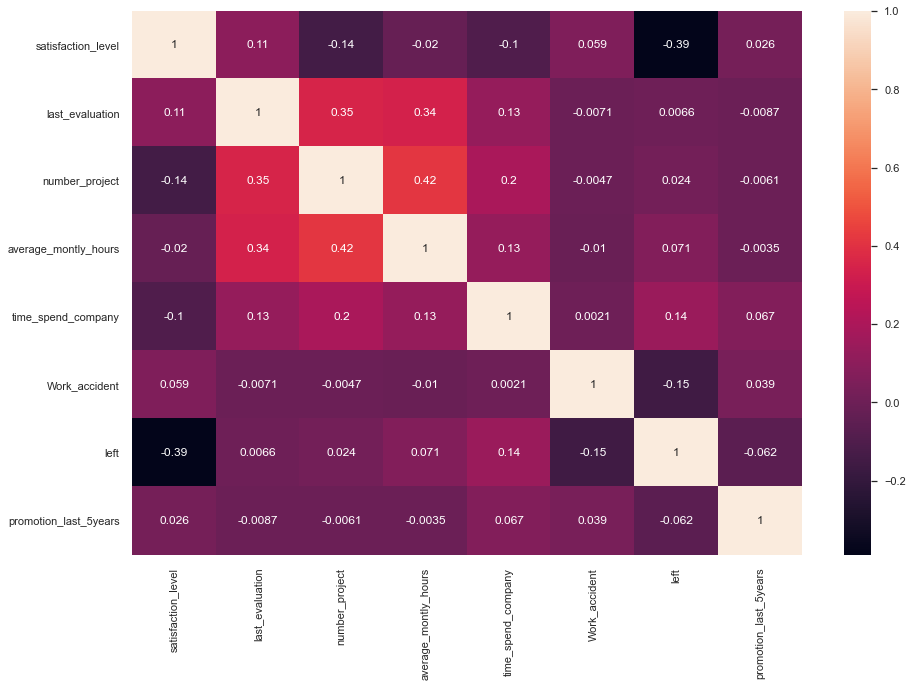

In [9]:
sns.set(rc = ({'figure.figsize':(15, 10)}))
sns.heatmap(data_corr, annot = True, 
            xticklabels = data_corr.columns.values, 
            yticklabels = data_corr.columns.values)

### 4. Визуализировать несколько взаимосвязей между переменными

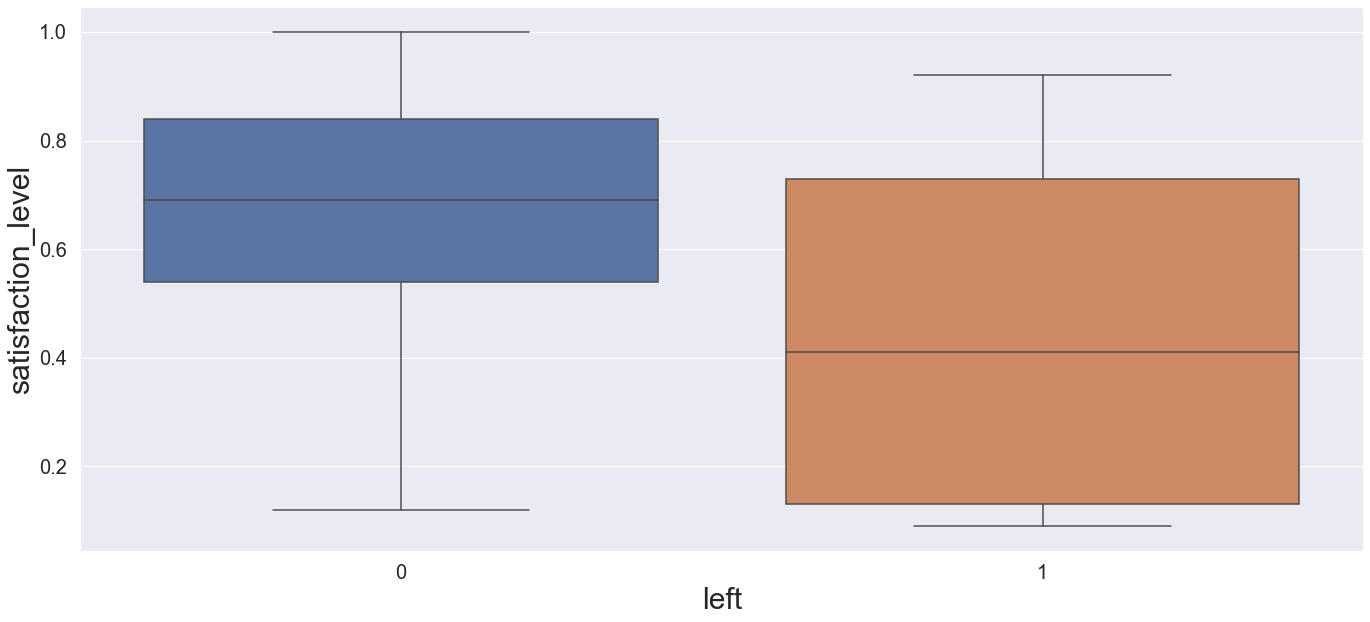

In [10]:
plt.rcParams['figure.figsize'] = (23,10)
ax = sns.boxplot(x = 'left', y = 'satisfaction_level', data = data)

ax.set_xlabel('left', fontsize = 30)
ax.set_ylabel('satisfaction_level', fontsize = 30)
ax.tick_params(labelsize = 20)
plt.show()

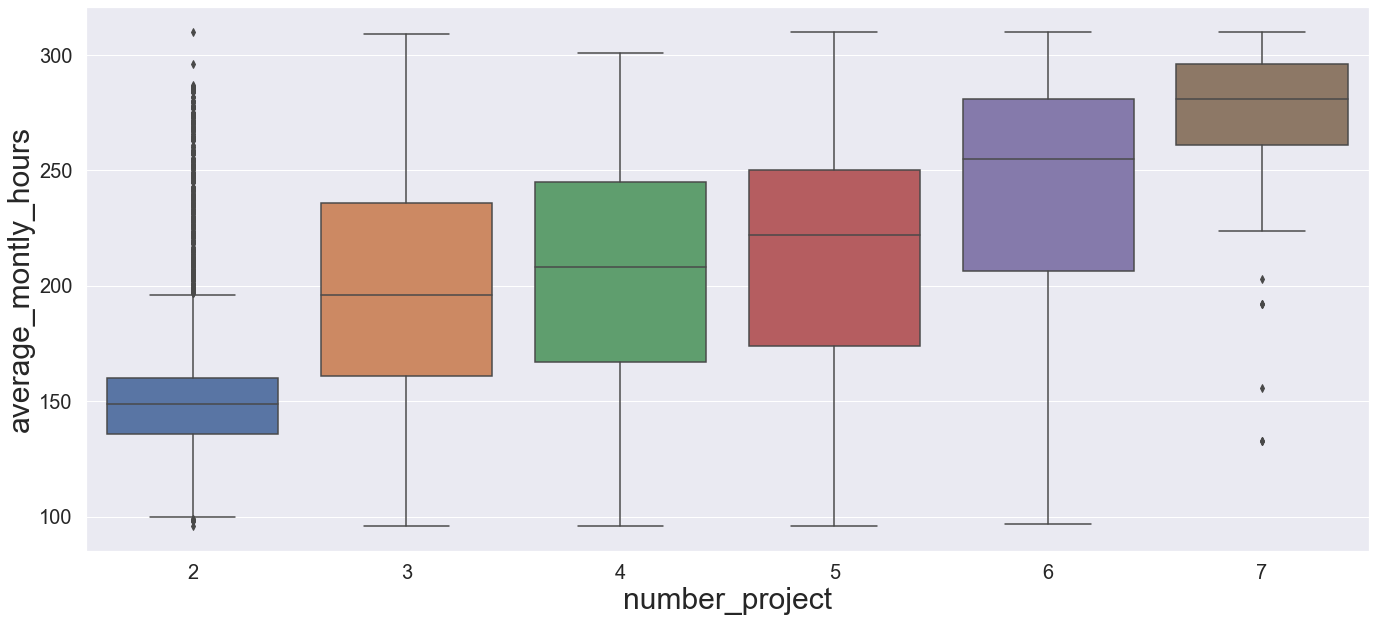

In [11]:
plt.rcParams['figure.figsize'] = (23,10)
ax = sns.boxplot(x = 'number_project', y = 'average_montly_hours', data = data)

ax.set_xlabel('number_project', fontsize = 30)
ax.set_ylabel('average_montly_hours', fontsize = 30)
ax.tick_params(labelsize = 20)
plt.show()

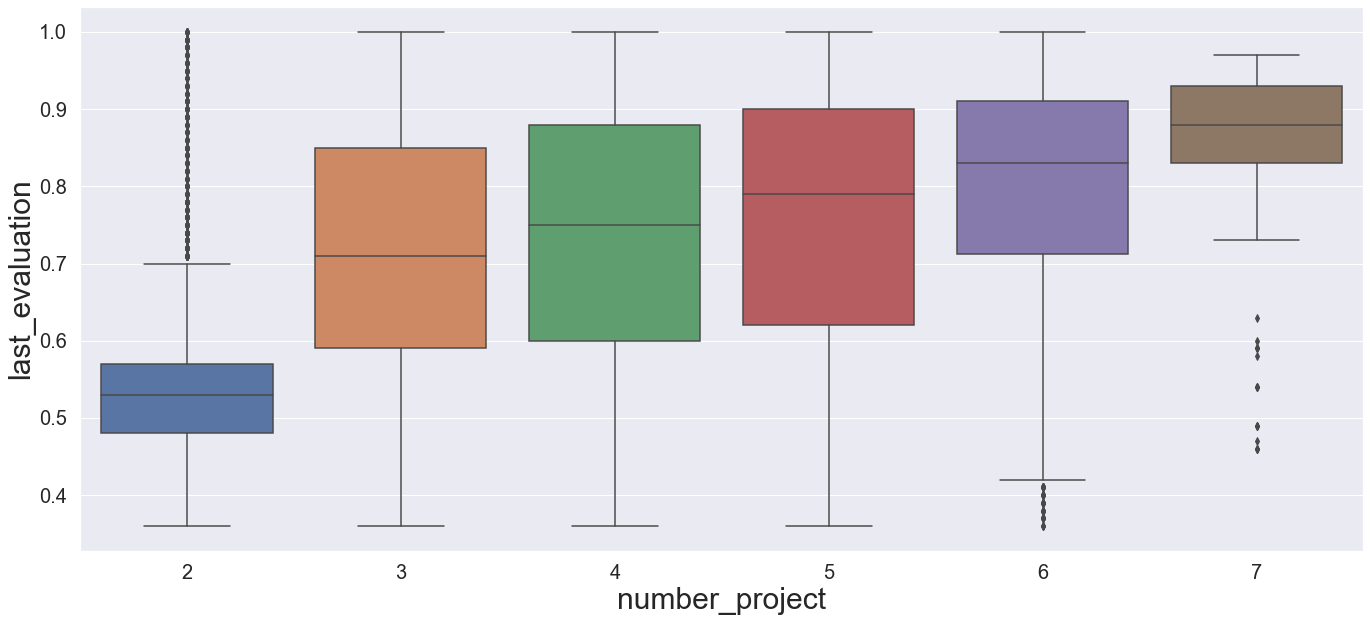

In [12]:
plt.rcParams['figure.figsize'] = (23,10)
ax = sns.boxplot(x = 'number_project', y = 'last_evaluation', data = data)

ax.set_xlabel('number_project', fontsize = 30)
ax.set_ylabel('last_evaluation', fontsize = 30)
ax.tick_params(labelsize = 20)
plt.show()

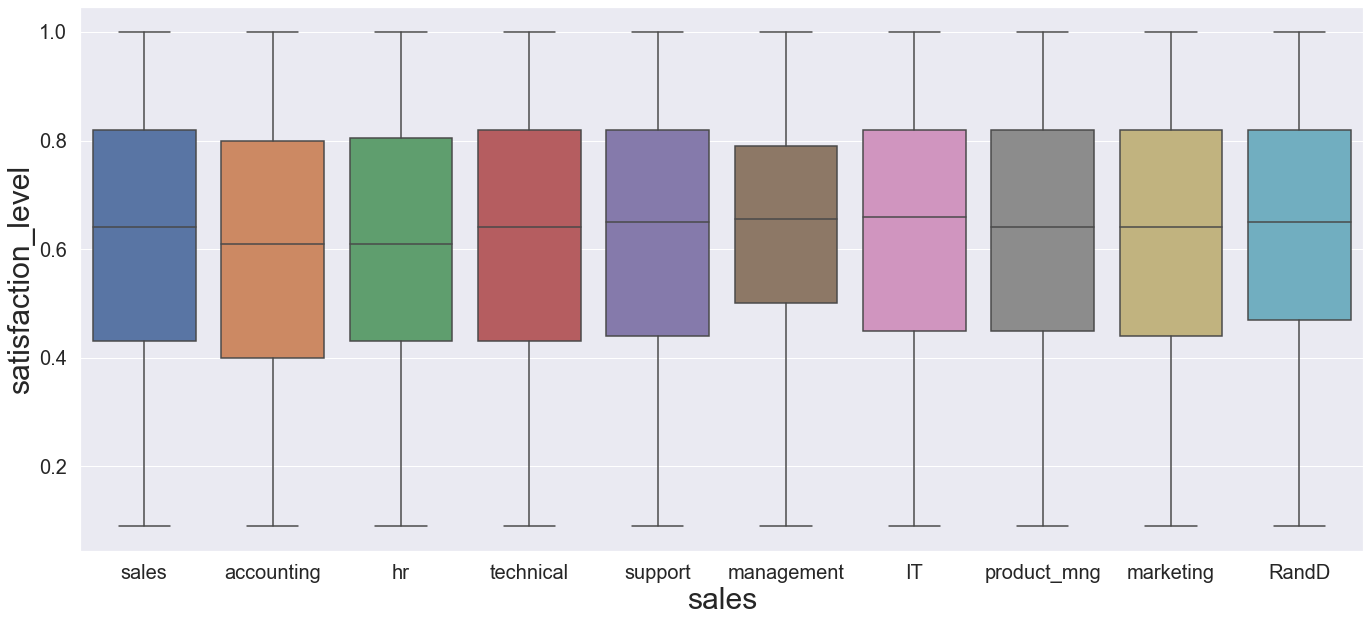

In [13]:
plt.rcParams['figure.figsize'] = (23,10)
ax = sns.boxplot(x = 'sales', y = 'satisfaction_level', data = data)

ax.set_xlabel('sales', fontsize = 30)
ax.set_ylabel('satisfaction_level', fontsize = 30)
ax.tick_params(labelsize = 20)
plt.show()

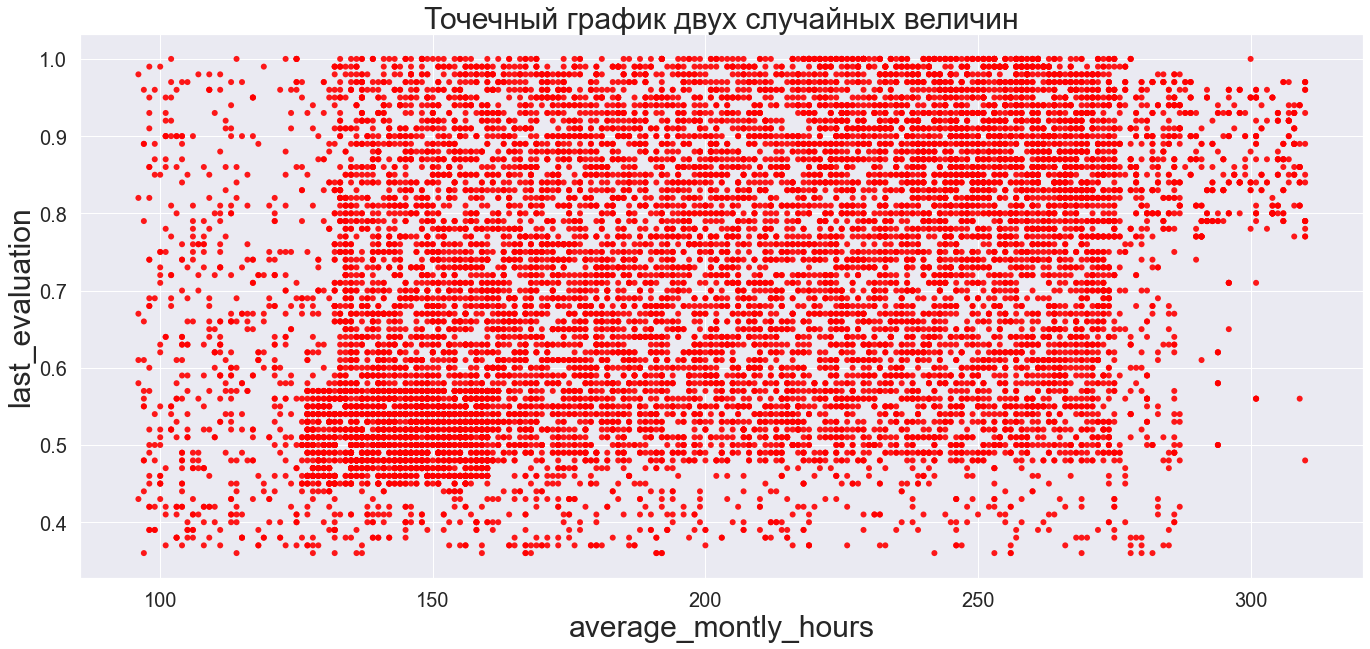

In [14]:
city = data['average_montly_hours']
highway = data['last_evaluation']
fig, ax = plt.subplots()
ax.scatter(city, highway, c = 'red', alpha = 0.9, edgecolors = 'none')

ax.grid(True)
plt.xlabel('average_montly_hours', fontsize = 30)
plt.ylabel('last_evaluation', fontsize = 30)
plt.title('Точечный график двух случайных величин', fontsize = 30)
ax.tick_params(labelsize = 20)
plt.show()

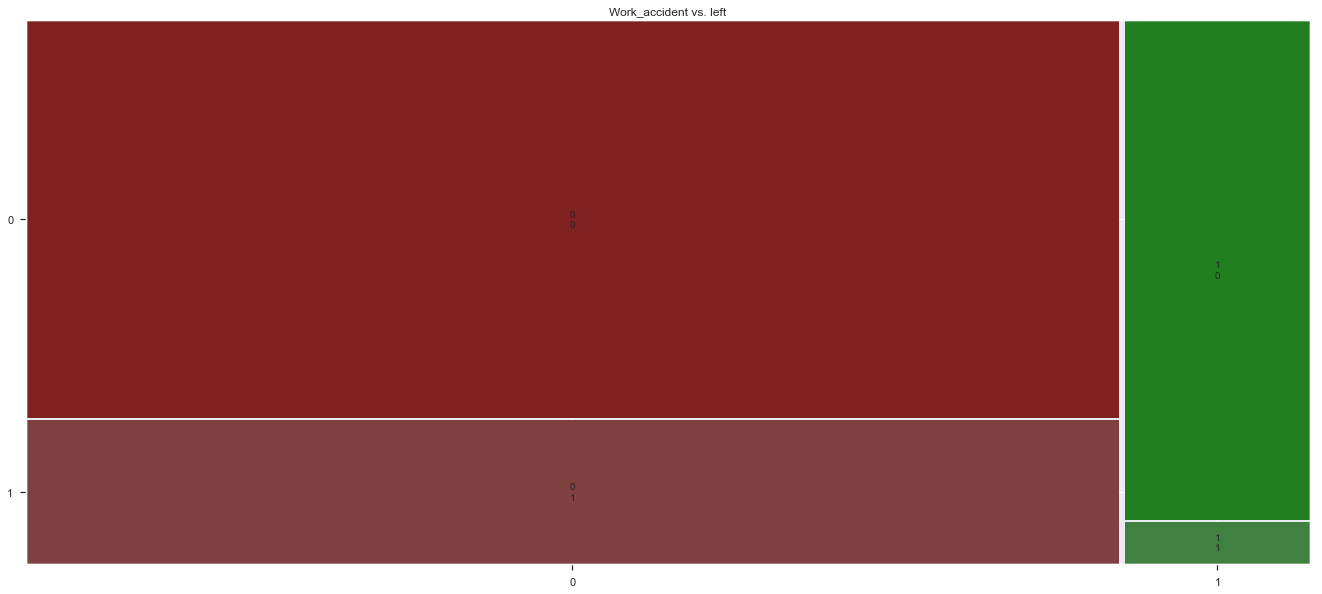

In [15]:
mosaic_diag = mosaic(data, ['Work_accident','left'], axes_label = True,
                    title = 'Work_accident vs. left')
plt.show()

In [90]:
data['accident_text'] = data['Work_accident'].apply(lambda x: 'accident' if x == 1 else 'no_accident')
data['left_text'] = data['left'].apply(lambda x: 'left' if x == 1 else 'remain')

In [17]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,accident_text,left_text
0,0.38,0.53,2,157,3,0,1,0,sales,low,no_accident,left
1,0.80,0.86,5,262,6,0,1,0,sales,medium,no_accident,left
2,0.11,0.88,7,272,4,0,1,0,sales,medium,no_accident,left
3,0.72,0.87,5,223,5,0,1,0,sales,low,no_accident,left
4,0.37,0.52,2,159,3,0,1,0,sales,low,no_accident,left


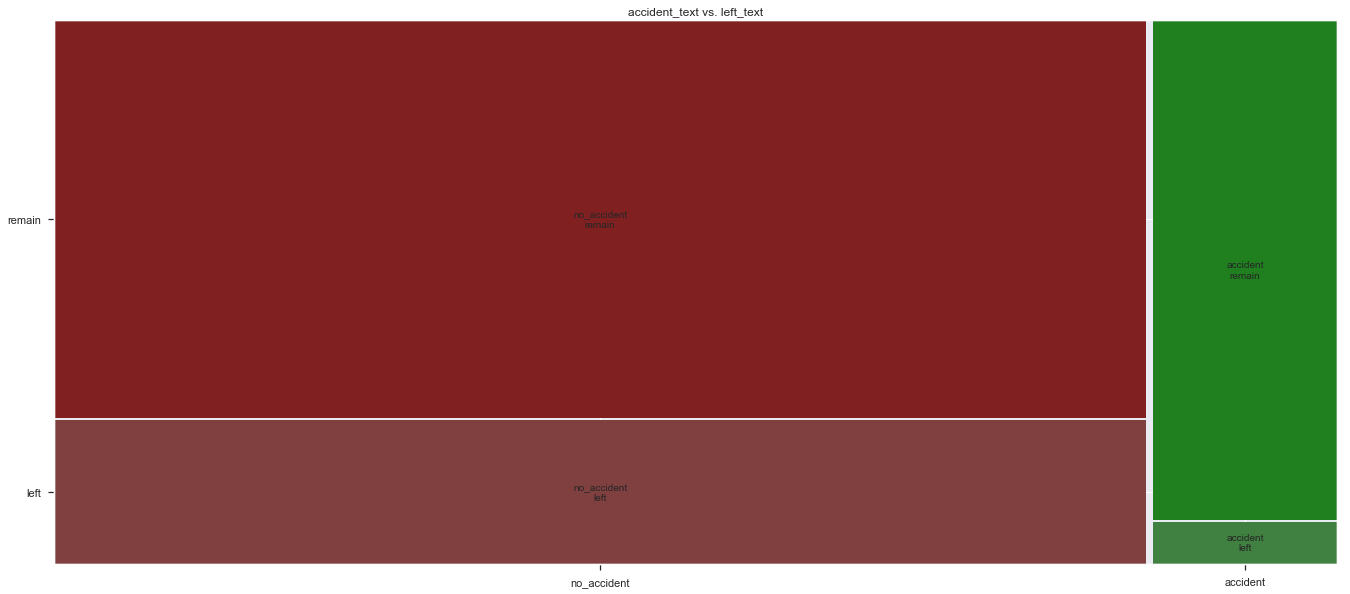

In [18]:
mosaic_diag = mosaic(data, ['accident_text','left_text'], axes_label = True,
                    title = 'accident_text vs. left_text')
plt.show()

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

#### <center>Гипотеза 1

In [19]:
satisfaction_left = data[data['left'] == 1]['satisfaction_level'].sample(300)
satisfaction_remain = data[data['left'] == 0]['satisfaction_level'].sample(300)

In [20]:
sts.shapiro(satisfaction_left)

(0.8899407386779785, 6.539982043331921e-14)

In [21]:
sts.shapiro(satisfaction_remain)

(0.9472073912620544, 6.6999654713129075e-09)

Нулевая гипотеза о нормальном распределении выборки отвергается, поэтому будем использовать непараметрический критерий (критерий Манна - Уитни).

In [22]:
sts.mannwhitneyu(satisfaction_left, satisfaction_remain)

MannwhitneyuResult(statistic=23104.0, pvalue=2.9939189982223267e-25)

In [23]:
satisfaction_remain.mean()

0.6677000000000002

In [24]:
satisfaction_left.mean()

0.44710000000000005

Общий уровень удовлетворенности работы у тех людей, которые остались, выше, чем у тех, кто уволился.

#### <center>Гипотеза 2

In [25]:
hours_number_pr = {'hours_2_pr' : data[data['number_project'] == 2]['average_montly_hours'].sample(256),
               'hours_3_pr' : data[data['number_project'] == 3]['average_montly_hours'].sample(256),
               'hours_4_pr' : data[data['number_project'] == 4]['average_montly_hours'].sample(256),
               'hours_5_pr' : data[data['number_project'] == 5]['average_montly_hours'].sample(256),
               'hours_6_pr' : data[data['number_project'] == 6]['average_montly_hours'].sample(256),
               'hours_7_pr' : data[data['number_project'] == 7]['average_montly_hours'].sample(256)}

In [26]:
for i in hours_number_pr:
    print(sts.shapiro(hours_number_pr[i])) 

(0.8284196257591248, 3.92983503447254e-16)
(0.981023371219635, 0.001708142925053835)
(0.9489907026290894, 8.439112519909031e-08)
(0.9618557095527649, 2.6340321710449643e-06)
(0.8949933052062988, 2.379202954441717e-12)
(0.8378942012786865, 1.1494560025551996e-15)


Все подвыборки не распределены по нормальному закону, следовательно, будем использовать критерий Крускала - Уоллиса.

In [27]:
sts.kruskal(hours_number_pr['hours_2_pr'], hours_number_pr['hours_3_pr'],
            hours_number_pr['hours_4_pr'], hours_number_pr['hours_5_pr'],
            hours_number_pr['hours_6_pr'], hours_number_pr['hours_7_pr'])

KruskalResult(statistic=608.0100192521141, pvalue=3.759480671454664e-129)

Различия между группами есть. Теперь необходимо определить, какие именно группы различаются.
Для этого необходимо выполнить попарные сравнения. Воспользуемся пакетом scikit_posthocs.

In [28]:
posthocs.posthoc_mannwhitney(data, val_col = 'average_montly_hours', group_col = 'number_project', 
                                    use_continuity = True, alternative='two-sided', 
                                    p_adjust = 'bonferroni', sort = True)

,2,3,4,5,6,7
2,-1.000000e+00,1.634040e-253,0.000000e+00,1.102670e-308,1.138383e-258,1.947347e-132
3,1.634040e-253,-1.000000e+00,2.742247e-13,2.680267e-38,4.834723e-133,1.589903e-118
4,0.000000e+00,2.742247e-13,-1.000000e+00,1.518776e-09,1.333630e-102,9.272133e-111
5,1.102670e-308,2.680267e-38,1.518776e-09,-1.000000e+00,2.264442e-68,3.998660e-100
6,1.138383e-258,4.834723e-133,1.333630e-102,2.264442e-68,-1.000000e+00,7.091201e-27
7,1.947347e-132,1.589903e-118,9.272133e-111,3.998660e-100,7.091201e-27,-1.000000e+00


Все группы различаются между собой. 

In [29]:
for i in hours_number_pr:
    print(median(hours_number_pr[i])) 

152.0
191.5
209.0
216.5
256.0
281.0


С увеличением числа проектов, в которых занят сотрудник, статистически значимо увеличивается количество часов работы.

#### <center>Гипотеза 3

In [30]:
time_left = data[data['left'] == 1]['time_spend_company'].sample(300)
time_remain = data[data['left'] == 0]['time_spend_company'].sample(300)

In [31]:
sts.shapiro(time_left)

(0.8369596004486084, 4.1175006102415487e-17)

In [32]:
sts.shapiro(time_remain)

(0.7753922939300537, 5.438697017899672e-20)

Нулевая гипотеза о нормальном распределении выборки отвергается, поэтому будем использовать непараметрический критерий (критерий Манна - Уитни).

In [33]:
sts.mannwhitneyu(time_left, time_remain)

MannwhitneyuResult(statistic=30482.5, pvalue=3.144506007786889e-13)

In [34]:
time_remain.describe()

count    300.000000
mean       3.376667
std        1.452062
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: time_spend_company, dtype: float64

In [35]:
time_left.describe()

count    300.000000
mean       3.880000
std        1.007796
min        2.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: time_spend_company, dtype: float64

Медианное значение для тех, кто ушел из компании статистически значимо превышает медианное значение количества лет для тех, кто остался. Возможно, это связано с профессиональным выгоранием.

### 6. Рассчитать сколько работников работает в каждом департаменте

In [36]:
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [37]:
group = data.groupby('sales').count()['satisfaction_level']

In [38]:
depts_barh = data.groupby('sales').count()['satisfaction_level'].sort_values().reset_index()
depts_barh

,sales,satisfaction_level
0,management,630
1,hr,739
2,accounting,767
3,RandD,787
4,marketing,858
5,product_mng,902
6,IT,1227
7,support,2229
8,technical,2720
9,sales,4140


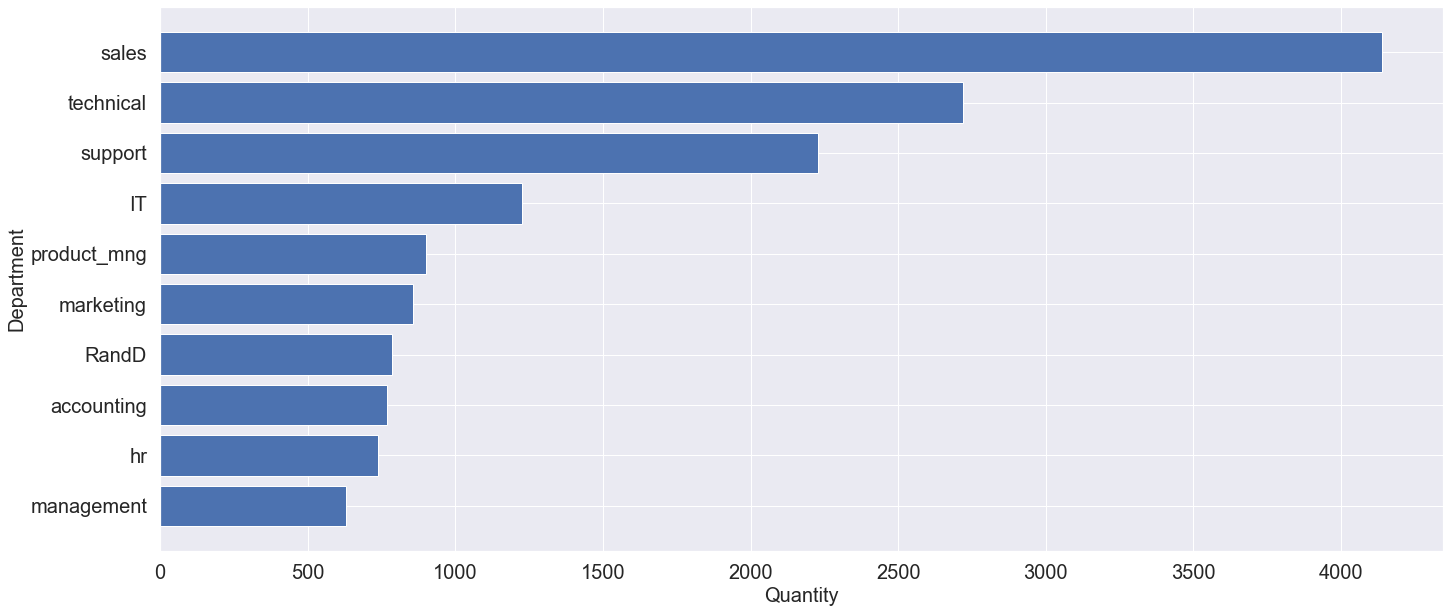

In [39]:
plt.barh(depts_barh['sales'], depts_barh['satisfaction_level'])
plt.xlabel('Quantity', fontsize = 20)
plt.ylabel('Department', fontsize = 20)
plt.tick_params(labelsize = 20)
plt.show()

### 7. Показать распределение сотрудников по зарплатам 

In [40]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

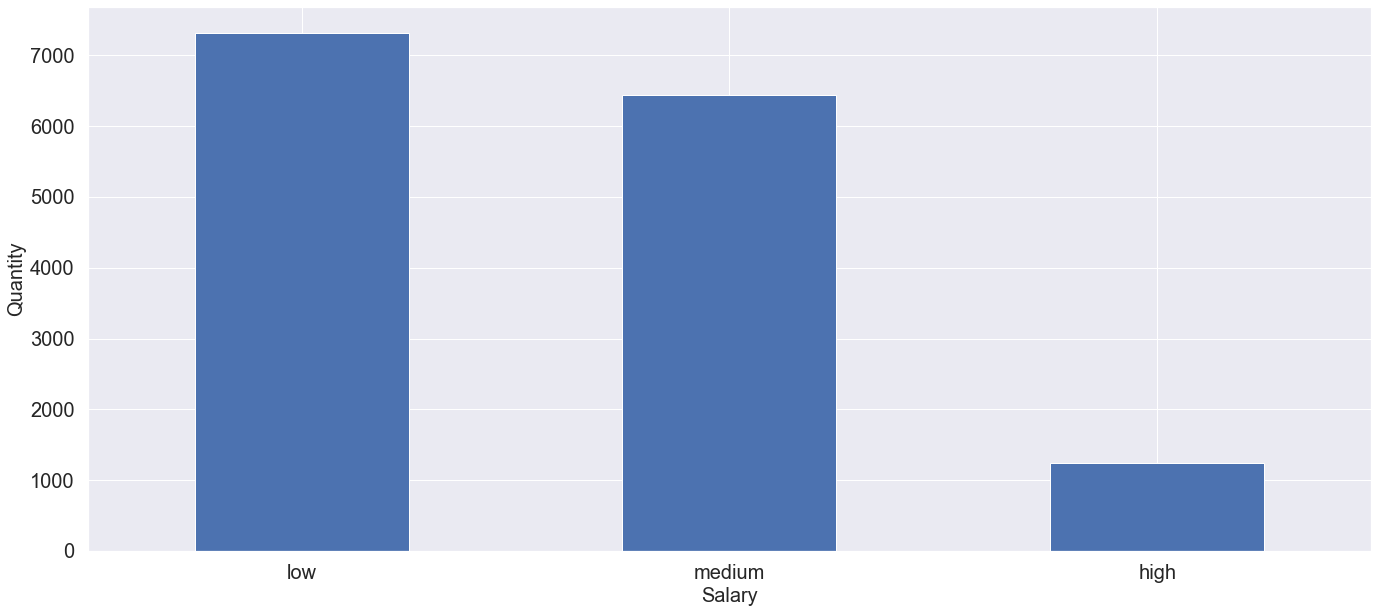

In [41]:
data['salary'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Salary', fontsize = 20)
plt.ylabel('Quantity', fontsize = 20)
plt.tick_params(labelsize = 20)

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [42]:
salaries = data.pivot_table(index = 'sales', 
                        columns = 'salary', 
                        values ='satisfaction_level', 
                        aggfunc = 'count').fillna(0).applymap(int)

In [43]:
salaries = pd.DataFrame(salaries[['low', 'medium', 'high']])
salaries

salary,low,medium,high
sales,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


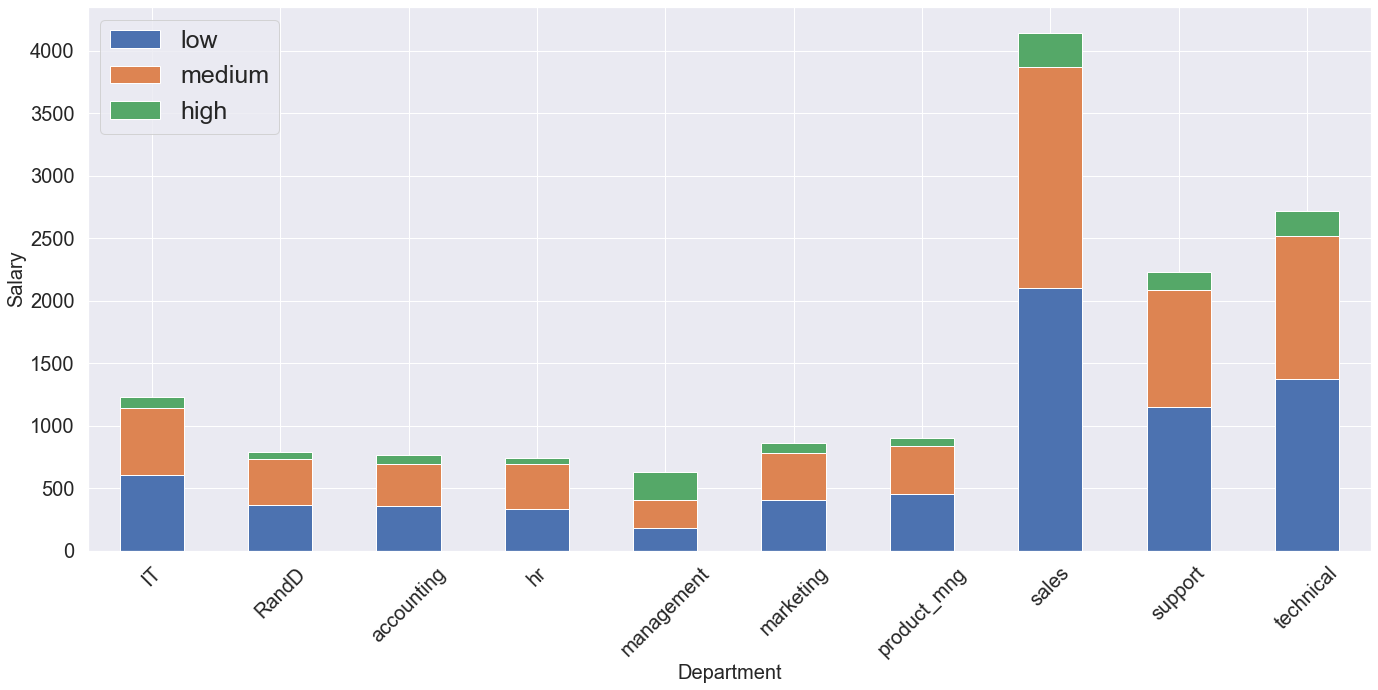

In [44]:
salaries.plot(kind='bar', rot=45, stacked=True)
plt.xlabel('Department', fontsize = 20)
plt.ylabel('Salary', fontsize = 20)
plt.tick_params(labelsize = 20)
plt.legend(loc = 'upper left', fontsize = 25)

### 9. Сколько сотрудников покинули компанию

In [45]:
left = data[data['left'] == 1]

In [46]:
len(left)

3571

### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [48]:
y = data['left']

In [91]:
x = copy.copy(data)

In [92]:
x.drop(['left', 'accident_text', 'left_text', 'sales', 'salary'], axis = 1, inplace = True)

In [93]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


Выделим из датасета тренировочные и тестовые данные. 
Тренировочные данные будем использовать для обучения модели.
Тестовые данные будем использовать для подсчета качества модели.

In [82]:
ros = RandomOverSampler(random_state = 0)

ros.fit(x, y)
x_resampled, y_resampled = ros.fit_sample(x, y)
print('Количество элементов до операции:', len(x))
print('Количество элементов после операции:', len(x_resampled))

Количество элементов до операции: 14999
Количество элементов после операции: 22856


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.3)

In [84]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train, y_train)

RandomForestClassifier()

Наиболее важные атрибуты для модели Random Forest:

No handles with labels found to put in legend.


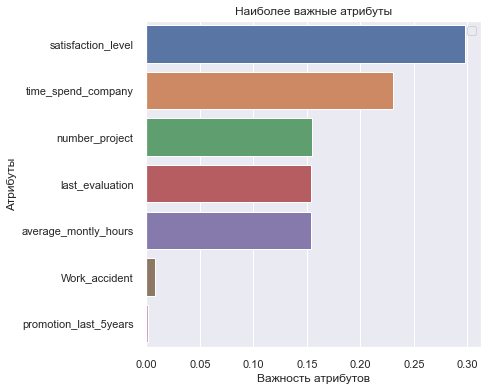

In [85]:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Посчитаем качество модели - classification report:

In [86]:
model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3411
           1       1.00      1.00      1.00      3446

    accuracy                           1.00      6857
   macro avg       1.00      1.00      1.00      6857
weighted avg       1.00      1.00      1.00      6857



0.9983957999124982

Модель "рандомных деревьев" дала точность предсказания порядка 99%.

Первые две переменные уже были проверены (см. пункт 5: гипотеза 1 и гипотеза 3), поэтому дополнительно проверим следующие три переменные: number_project, last_evaluation, average_montly_hours.

#### <center>Гипотеза 4

In [118]:
number_pr_left = data[data['left'] == 1]['number_project'].sample(300)
number_pr_remain = data[data['left'] == 0]['number_project'].sample(300)

In [119]:
sts.shapiro(number_pr_left)

(0.8269184827804565, 1.2471348328722182e-17)

In [120]:
sts.shapiro(number_pr_remain)

(0.902329683303833, 5.202773433431174e-13)

In [121]:
sts.mannwhitneyu(number_pr_left, number_pr_remain)

MannwhitneyuResult(statistic=44127.0, pvalue=0.33731886372003317)

In [122]:
number_pr_left.describe()

count    300.000000
mean       3.980000
std        1.852306
min        2.000000
25%        2.000000
50%        4.000000
75%        6.000000
max        7.000000
Name: number_project, dtype: float64

In [123]:
number_pr_remain.describe()

count    300.000000
mean       3.810000
std        0.985123
min        2.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        6.000000
Name: number_project, dtype: float64

Мы не можем отвергнуть нулевую гипотезу, следовательно, количество проектов не влияет на принятие сотрудником решения об увольнении.

#### <center>Гипотеза 5

In [124]:
eval_left = data[data['left'] == 1]['last_evaluation'].sample(300)
eval_remain = data[data['left'] == 0]['last_evaluation'].sample(300)

In [125]:
sts.shapiro(eval_left)

(0.8450684547424316, 1.123925106035975e-16)

In [126]:
sts.shapiro(eval_remain)

(0.9677679538726807, 3.053058208024595e-06)

In [127]:
sts.mannwhitneyu(eval_left, eval_remain)

MannwhitneyuResult(statistic=44025.0, pvalue=0.3230755101080716)

In [128]:
eval_left.describe()

count    300.000000
mean       0.704900
std        0.198284
min        0.450000
25%        0.517500
50%        0.635000
75%        0.900000
max        1.000000
Name: last_evaluation, dtype: float64

In [129]:
eval_remain.describe()

count    300.000000
mean       0.703967
std        0.167040
min        0.370000
25%        0.580000
50%        0.710000
75%        0.840000
max        1.000000
Name: last_evaluation, dtype: float64

Мы не можем отвергнуть нулевую гипотезу, следовательно, оценка не влияет на принятие сотрудником решения об увольнении.

#### <center>Гипотеза 6

In [130]:
hours_left = data[data['left'] == 1]['average_montly_hours'].sample(300)
hours_remain = data[data['left'] == 0]['average_montly_hours'].sample(300)

In [131]:
sts.shapiro(hours_left)

(0.8767328858375549, 8.507114419376363e-15)

In [132]:
sts.shapiro(hours_remain)

(0.9660489559173584, 1.703283260212629e-06)

In [133]:
sts.mannwhitneyu(hours_left, hours_remain)

MannwhitneyuResult(statistic=38155.5, pvalue=0.0006326695288919425)

In [134]:
hours_left.describe()

count    300.000000
mean     213.066667
std       59.894798
min      127.000000
25%      149.000000
50%      233.000000
75%      263.250000
max      310.000000
Name: average_montly_hours, dtype: float64

In [135]:
hours_remain.describe()

count    300.000000
mean     198.700000
std       46.389906
min      101.000000
25%      162.000000
50%      200.000000
75%      238.000000
max      278.000000
Name: average_montly_hours, dtype: float64

Мы можем отвергнуть нулевую гипотезу, следовательно, среднее количество отработанных часов в месяц влияет на принятие сотрудником решения об увольнении.

**Вывод:** среди 5 проанализированных переменных на принятие решения об увольнении влияют следующие:
* satisfaction_level (уровень удовлетворенностью сотрудником работой);
* time_spend_company (количество лет, которые сотрудник проработал в компании);
* average_montly_hours (среднее количество отработанных часов в месяц).